In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
Gráfico  
* anotações com setas
* elipses
* linhas horizontais e verticais
---
Estatísitica
* medidas de tendência central (média, mediana, moda)
---
Datasets
- `volume_amaciante.csv`
- `medidas_sabao_em_po.csv`
---

In [2]:
df_vol_amaciante = pd.read_csv(
    "https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/volume_amaciante.csv"
)
df_vol_amaciante.head()

,Volume
0,999.8
1,999.5
2,999.7
3,999.1
4,999.8


In [3]:
df_vol_amaciante.describe().T

,count,mean,std,min,25%,50%,75%,max
Volume,1000.0,999.9897,0.48553,998.3,999.7,1000.0,1000.3,1001.5


---

Base 1: "Como se caracteriza a distribuição dos volumes da amostra de amaciante em termos de medidas de tendência central (média e mediana), dispersão por quartis e presença de valores discrepantes (outliers)?"

Base 2: "Qual é o perfil de distribuição das dimensões das embalagens de sabão em pó e quais itens da amostra A seriam rejeitados ao aplicar uma tolerância de ±1% sobre os valores nominais de 20 cm (comprimento) e 15 cm (altura)?"

---

In [4]:
sns.set_theme(style="white")

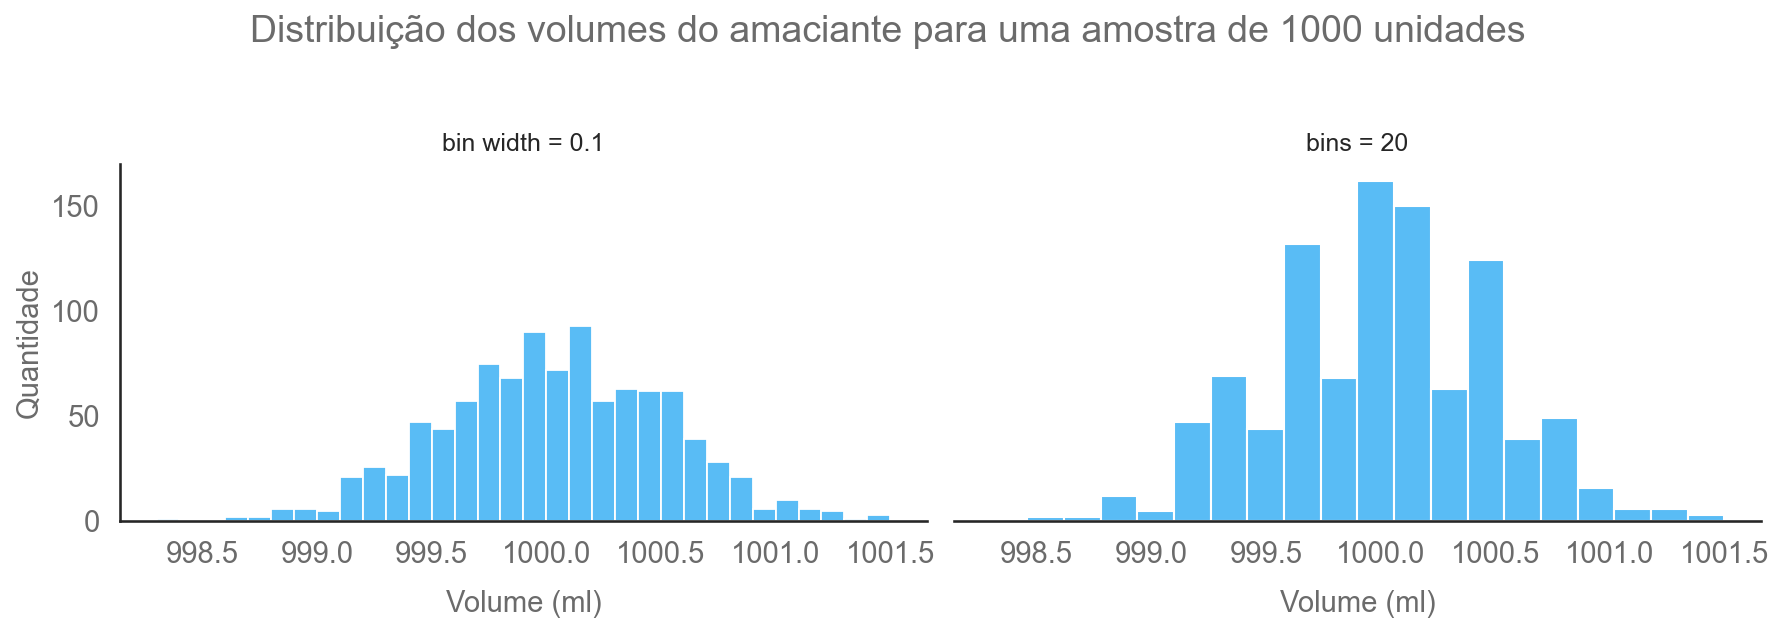

In [5]:
# ---
# Distribuição de uma variável => Histograma
# 1. de colunas (poucas observações)
# 2. de linhas (muitas observações)

fig, (ax1, ax2) = plt.subplots(
    ncols=2,
    figsize=(12, 4),
    dpi=150,
    sharex=True,
    sharey=True,
)
fig.suptitle(
    "Distribuição dos volumes do amaciante para uma amostra de 1000 unidades",
    size=18,
    color="#6b6b6b",
    ha="center",
    va="top",
    x=0.5,
    y=1.05,
)


for ax in [ax1, ax2]:
    ax.set_xlabel("Volume (ml)", fontsize=14, labelpad=10, color="#6b6b6b")
    ax.set_ylabel("Quantidade", fontsize=14, color="#6b6b6b")
    ax.xaxis.set_tick_params(labelsize=14, labelcolor="#6b6b6b")
    ax.yaxis.set_tick_params(labelsize=14, labelcolor="#6b6b6b")

ax1.set_title("bin width = 0.1")
ax2.set_title("bins = 20")

ax1.spines[["top", "right"]].set_visible(False)
ax2.spines[["top", "right", "left"]].set_visible(False)
ax2.set_ylabel("")

sns.histplot(data=df_vol_amaciante, x="Volume", binwidth=0.1, color="#22a6f2", ax=ax1)
sns.histplot(data=df_vol_amaciante, x="Volume", bins=20, color="#22a6f2", ax=ax2)

plt.tight_layout()
plt.show()

- Histogramas "Contínuos" : KDE (Kernel Density Estimation)

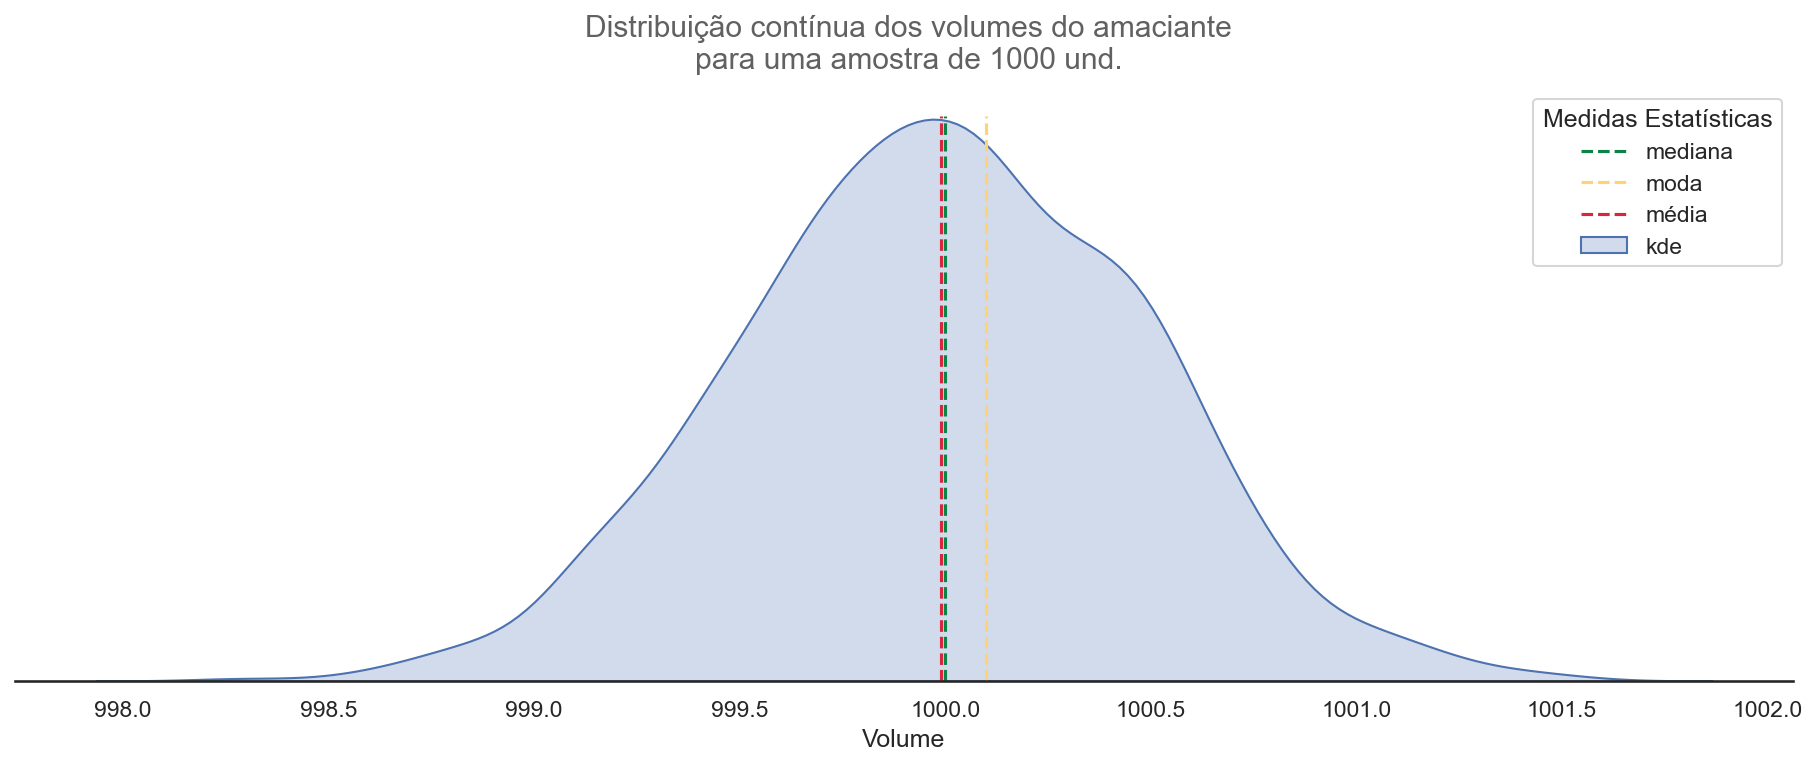

In [6]:
fig, ax = plt.subplots(figsize=(12, 5), dpi=150, layout="constrained")
fig.suptitle(
    "Distribuição contínua dos volumes do amaciante\npara uma amostra de 1000 und.",
    color="#616161",
)
sns.kdeplot(data=df_vol_amaciante, x="Volume", fill=True, ax=ax, label="kde")
ax.set_ylabel("")
ax.set_yticklabels([])

# ---
# Estatística Descritiva
media, moda, mediana = (
    df_vol_amaciante["Volume"].mean(),
    df_vol_amaciante["Volume"].mode()[0],
    df_vol_amaciante["Volume"].median(),
)

# ---
# Linhas verticais finitas
# ax.vlines() === (Plot vertical lines at each *x* from *ymin* to *ymax*.)

medidas = [media, moda, mediana]
cores = ["#D7263D", "#FFD275", "#0C8346"]
labels = ["média", "moda", "mediana"]
for i, (color, medida) in enumerate(zip(cores, medidas)):
    ymin, ymax = ax.get_ybound()  #
    ax.vlines(x=medida, ymin=ymin, ymax=0.8, ls="--", colors=cores[i], label=labels[i])


sns.despine(left=True)
ax.legend(title="Medidas Estatísticas", reverse=True)
plt.show()


--- 

<font size=5> Boxplot </font>

<font color="#424243" size=3 > Orientação do Boxplot - Vertical ou Horizontal ?</font>

<div align="center">

| Situação                        | Melhor escolha |
| ------------------------------- | -------------- |
| Muitas categorias               | Horizontal     |
| Rótulos longos                  | Horizontal     |
| Poucas categorias               | Vertical       |
| Comparação direta de valores    | Vertical       |
| Dados ordenados por estatística | Horizontal     |
| Dashboard / painel              | Consistente    |

</div>

---
Referências:

[PERES, Fernanda F. Como interpretar (e construir) um gráfico boxplot?. Blog Fernanda Peres, São Paulo, 29 mar. 2022. Disponível em: https://fernandafperes.com.br/blog/interpretacao-boxplot/.](https://fernandafperes.com.br/blog/interpretacao-boxplot/)

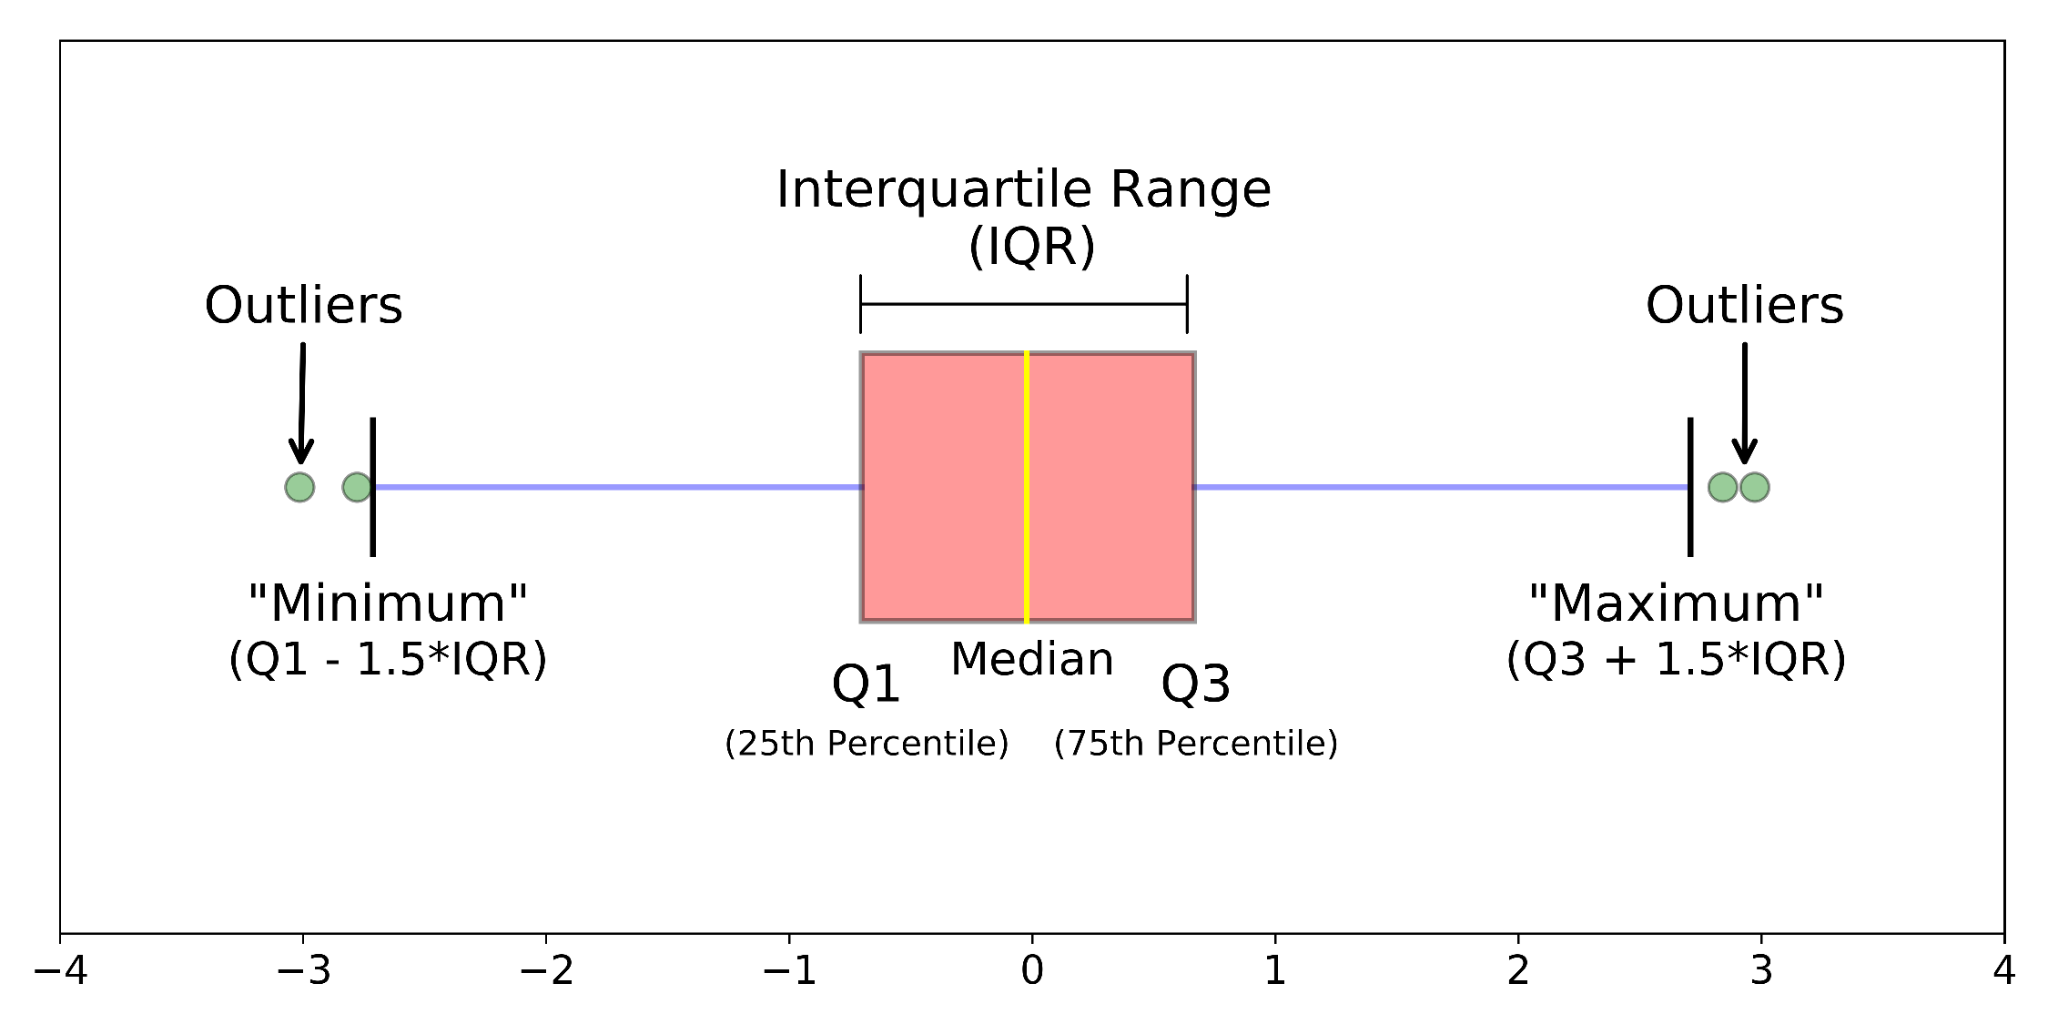

In [7]:
from matplotlib.patches import Ellipse

In [8]:
# --- Não há necessidade trabalhar com um DataFrame "1D".
# Volumes em numpy array 1D
y = df_vol_amaciante["Volume"].to_numpy()
q1 , q2 , q3 =  np.quantile(y, [0.25, 0.5, 0.75])

In [9]:
labels = [(q1, "1º Quartil / 25%"), (q2, "2º Quartil / 50%"), (q3, "3º Quartil / 75%")]


In [10]:
# ---
# Customize the plot using parameters of the underlying matplotlib function
# Elementos do boxplot possuem propriedades mapeadas em um dict()
# 1. Caixa == boxprops
# 2. Mediana == medianprops
# 3. Whiskers == whiskerprops
# 4. Caps == capprops
# 5. Outliers (fliers) == flier props
# --
boxprops = dict(facecolor="#ff322e",edgecolor="#343434",alpha=0.85,linewidth=1.8)
medianprops = dict(color="#626134",linewidth=3)
whiskerprops = dict(color="#0707f1",linewidth=2)
capprops = dict(color="black",linewidth=2.5)
flierprops =dict(marker="o",markersize=10,markerfacecolor="#9ad29a",markeredgecolor="#666666",alpha=0.9)


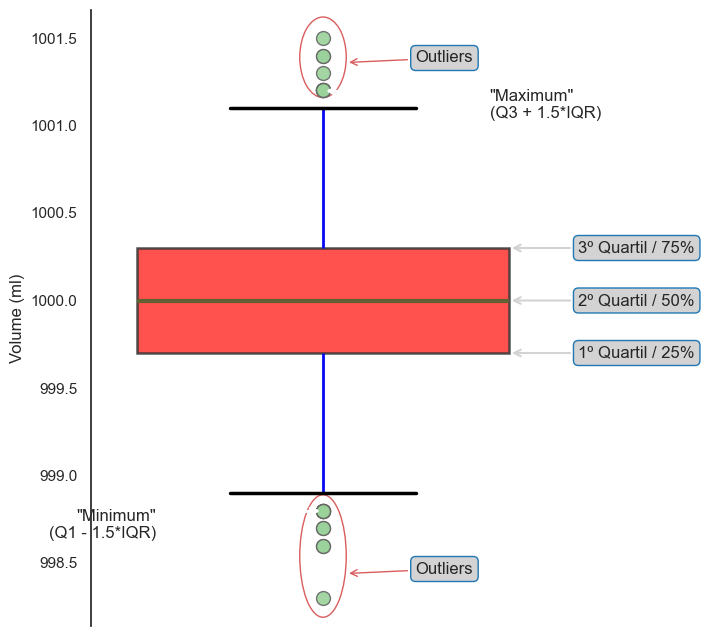

In [11]:
# Boxplot Vertical => 1 categoria (Volume)
fig, ax = plt.subplots(figsize=(6, 8))
sns.boxplot(
    data=df_vol_amaciante,
    y="Volume",
    orient="v",
    ax=ax,
    boxprops=boxprops,
    medianprops=medianprops,
    whiskerprops=whiskerprops,
    capprops=capprops,
    flierprops=flierprops,
)

# Patches
ymin, ymax = ax.get_ybound()
outliers_up: Ellipse = Ellipse(
    xy=(0, ymax - 0.27),  # coords of center
    width=0.1,
    height=0.46,
    angle=0,
    color="#da5d5d",
    fill=False,
)
outliers_down: Ellipse = Ellipse(
    xy=(0, ymin + 0.4),  # coords of center
    width=0.1,
    height=0.7,
    angle=0,
    color="#da5d5d",
    fill=False,
)

# Draw Ellipses
for ellipse in [outliers_up, outliers_down]:
    ax.add_patch(ellipse)

# Annotate on Outliers
bullet_box = dict(boxstyle="round", fc="lightgray", ec="tab:blue")
arrowprops = dict(arrowstyle="->", color="#da5d5d")

ax.annotate(
    text="Outliers",
    xy=(5e-2, ymax - 3e-1),
    xytext=(50, 0),
    xycoords="data",
    textcoords="offset points",
    bbox=bullet_box,
    arrowprops=arrowprops,
)
ax.annotate(
    text="Outliers",
    xy=(5e-2, ymin + 3e-1),
    xytext=(50, 0),
    xycoords="data",
    textcoords="offset points",
    bbox=bullet_box,
    arrowprops=arrowprops,
)

# Annotate on Quantiles
quantile_bbox = dict(boxstyle="round", fc="lightgray", ec="tab:blue")
arrow_qi = dict(arrowstyle="->", color="lightgray", lw=1.5)

x_box_center = 0.0  # 1 box => centro em x=0 (coords de dados)
for q, lab in labels:
    ax.annotate(
        text=lab,
        xy=(x_box_center + 4e-1, q),  # ponto que a seta aponta (DADOS)
        xycoords="data",
        xytext=(50, 0),
        textcoords="offset points",
        va="center",
        bbox=quantile_bbox,
        arrowprops=arrow_qi,
        clip_on=False,
    )

lower_fence = q1 - 1.5*(q3-q1)
upper_fence = q3 + 1.5*(q3-q1)

ax.annotate(
    '"Minimum"\n(Q1 - 1.5*IQR)',
    xy=(0, lower_fence),
    xytext=(-120, -20),
    textcoords="offset points",
    arrowprops=dict(arrowstyle="->", lw=2),
    ha="right",
)

ax.annotate(
    '"Maximum"\n(Q3 + 1.5*IQR)',
    xy=(0, upper_fence),
    xytext=(120, -20),
    textcoords="offset points",
    arrowprops=dict(arrowstyle="->", lw=2),
    ha="left",
)



ax.set_ylabel("Volume (ml)")
sns.despine(ax=ax, bottom=True)
plt.show()

---


### Desafio 1 



Baixe a base de dados com as amostras das idades dos moradores do município de Cidade Alegre e crie os histogramas de colunas e de linha lado a lado, buscando interpretar as diferenças entre eles e o que podem representar separadamente. Adicione também uma linha que define a mediana da distribuição no histograma de linha e escreva o valor dessa medida no gráfico.

In [12]:
df_idades = pd.read_csv("https://cdn3.gnarususercontent.com.br/3057-data-visualization/Atividades/Aula+04/pop_idade.csv")
df_idades.head()

,idade
0,39
1,33
2,41
3,50
4,32


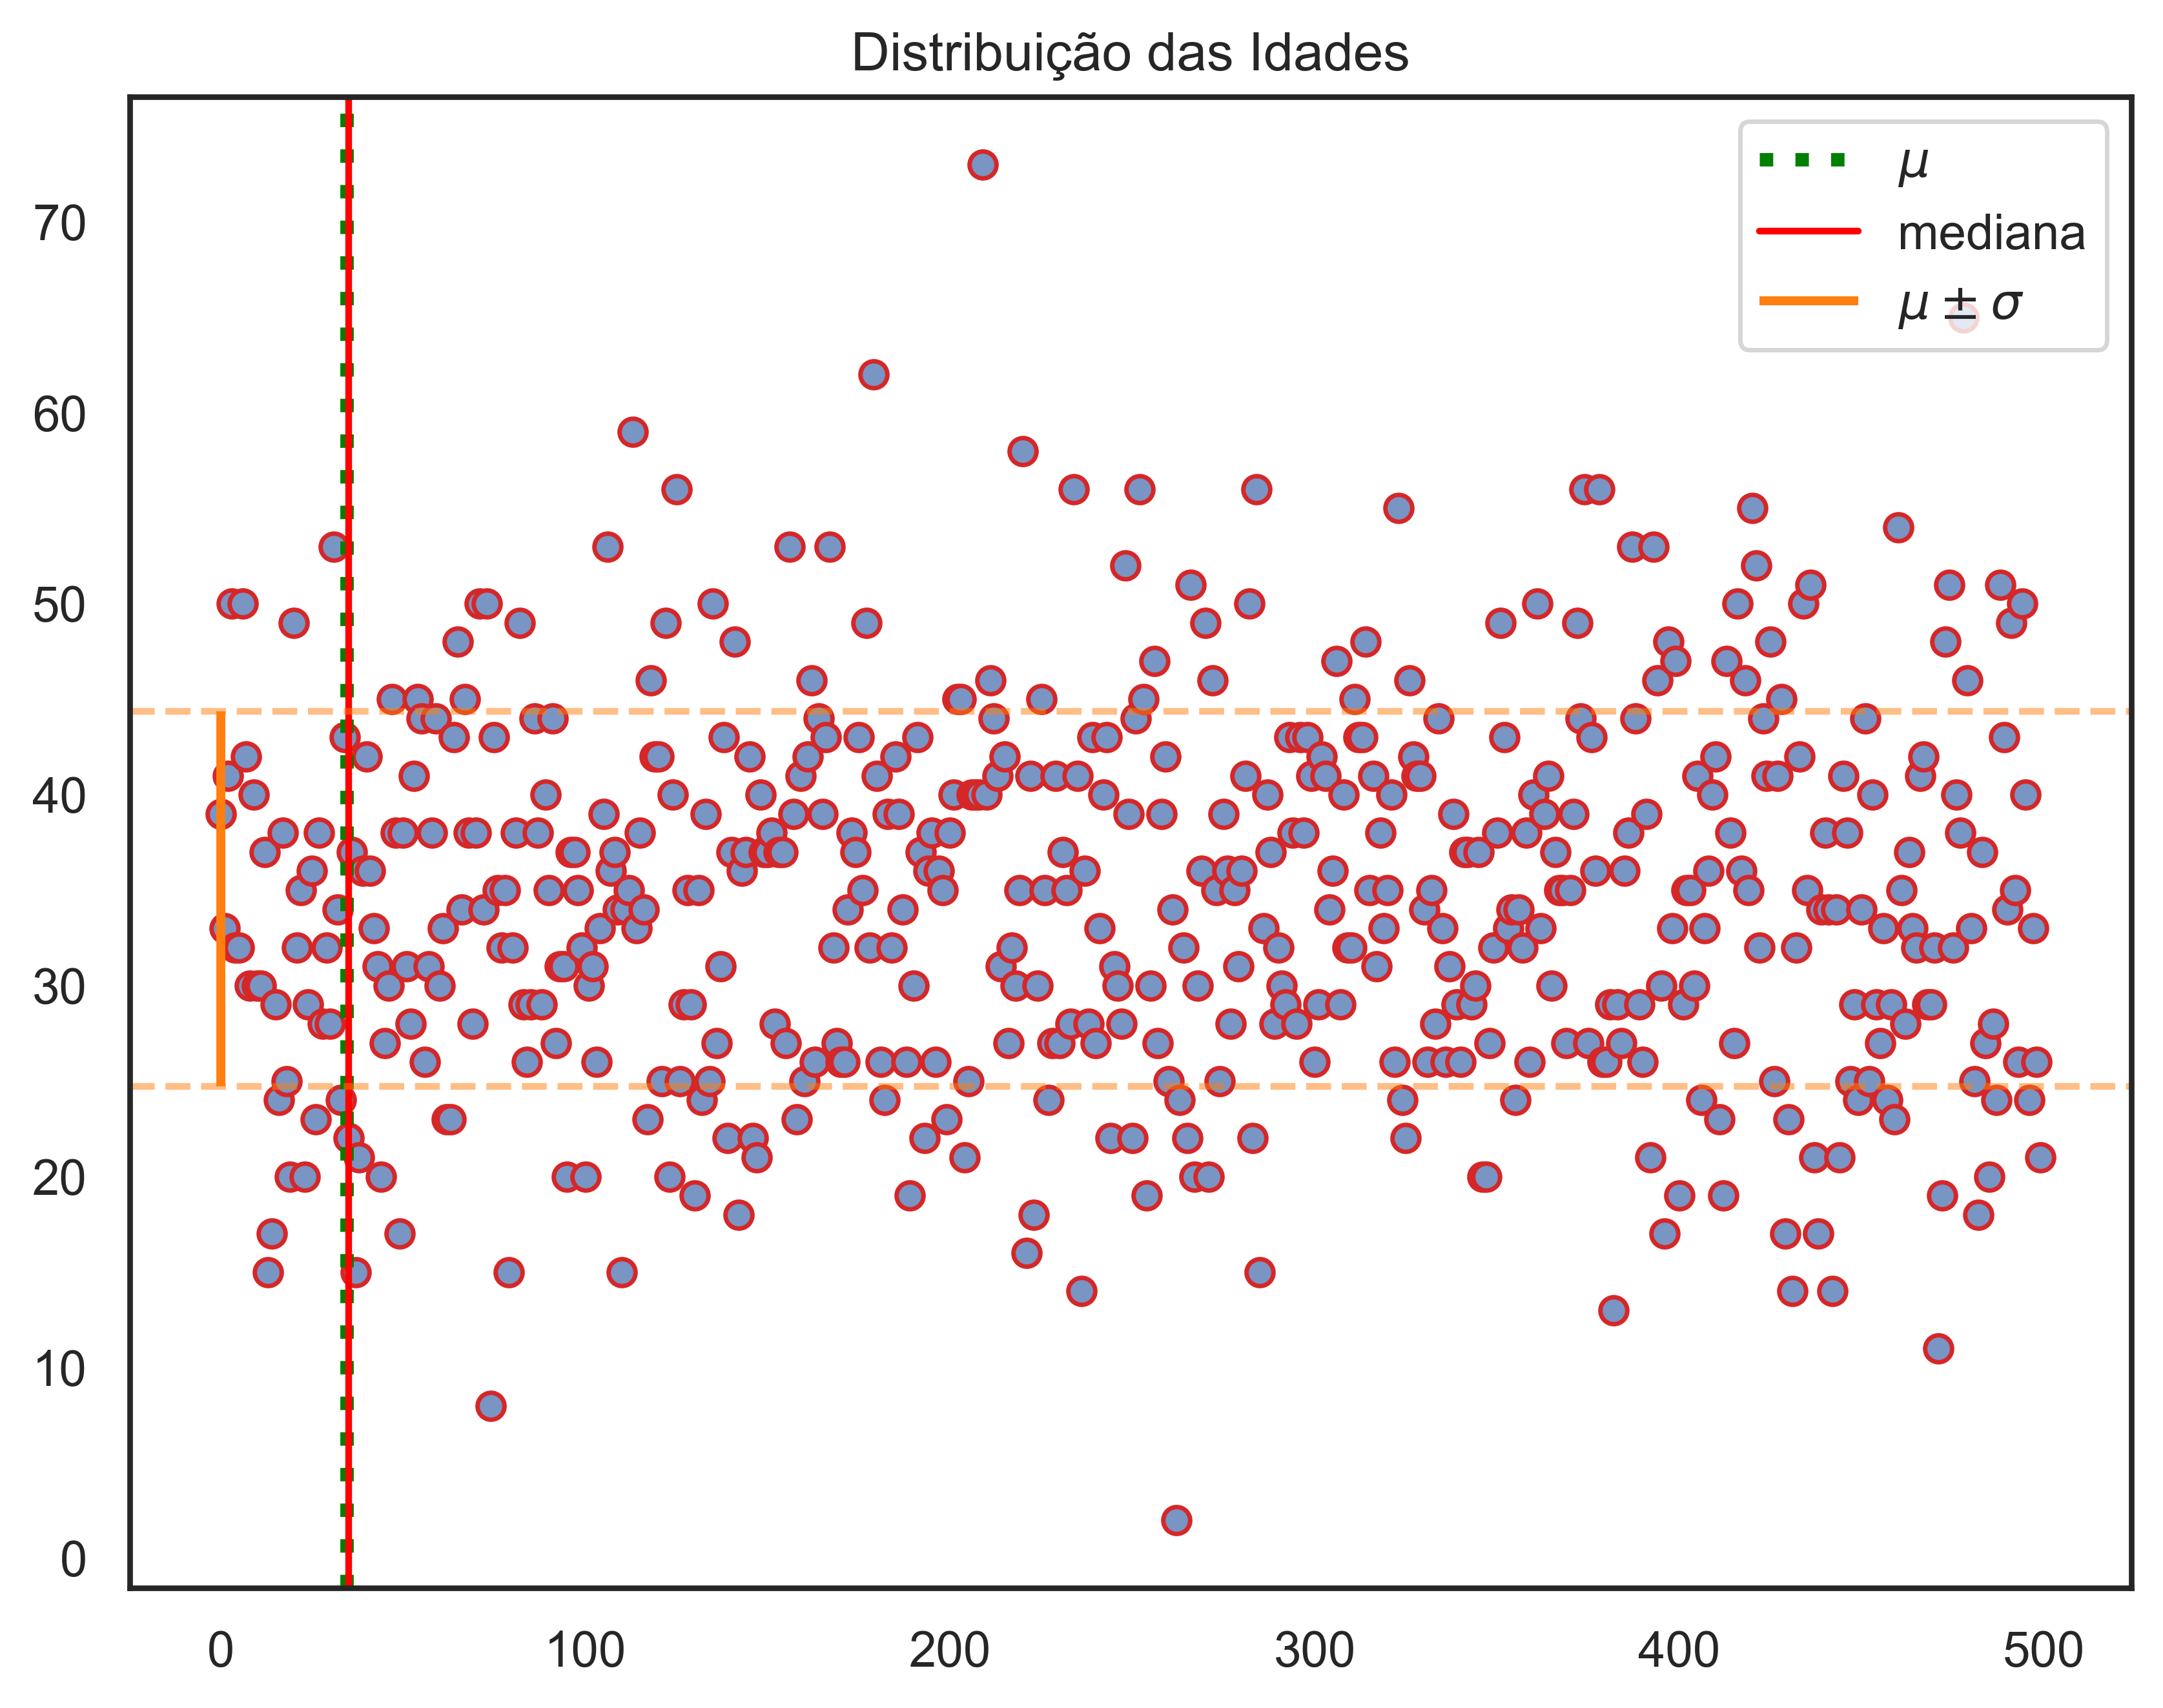

In [13]:
media = df_idades.idade.mean()
mediana = df_idades.idade.median()
std_dev = df_idades.idade.std()

fig, ax = plt.subplots(figsize=(8, 6), dpi=500)
ax.set_title("Distribuição das Idades")
ax.scatter(df_idades.index, df_idades.idade, zorder=0, facecolor="#7995c4",edgecolor="tab:red")

# Linhas
ax.axvline(media, color="green", ls=":", lw=3, label=r"$\mu$")
ax.axvline(mediana, color="red", ls="-", label="mediana")
ax.vlines(
    x=0,
    ymin=media - std_dev,
    ymax=media + std_dev,
    color="tab:orange",
    label=r"$\mu \pm \sigma$",
    lw=2,
)
ax.axhline(y=media + std_dev, color="tab:orange", ls="--", alpha=0.5)
ax.axhline(y=media - std_dev, color="tab:orange", ls="--", alpha=0.5)

ax.legend()
plt.show()

In [14]:
df_idades.max() , df_idades.min(), df_idades.shape[0]

(idade    73
 dtype: int64,
 idade    2
 dtype: int64,
 500)

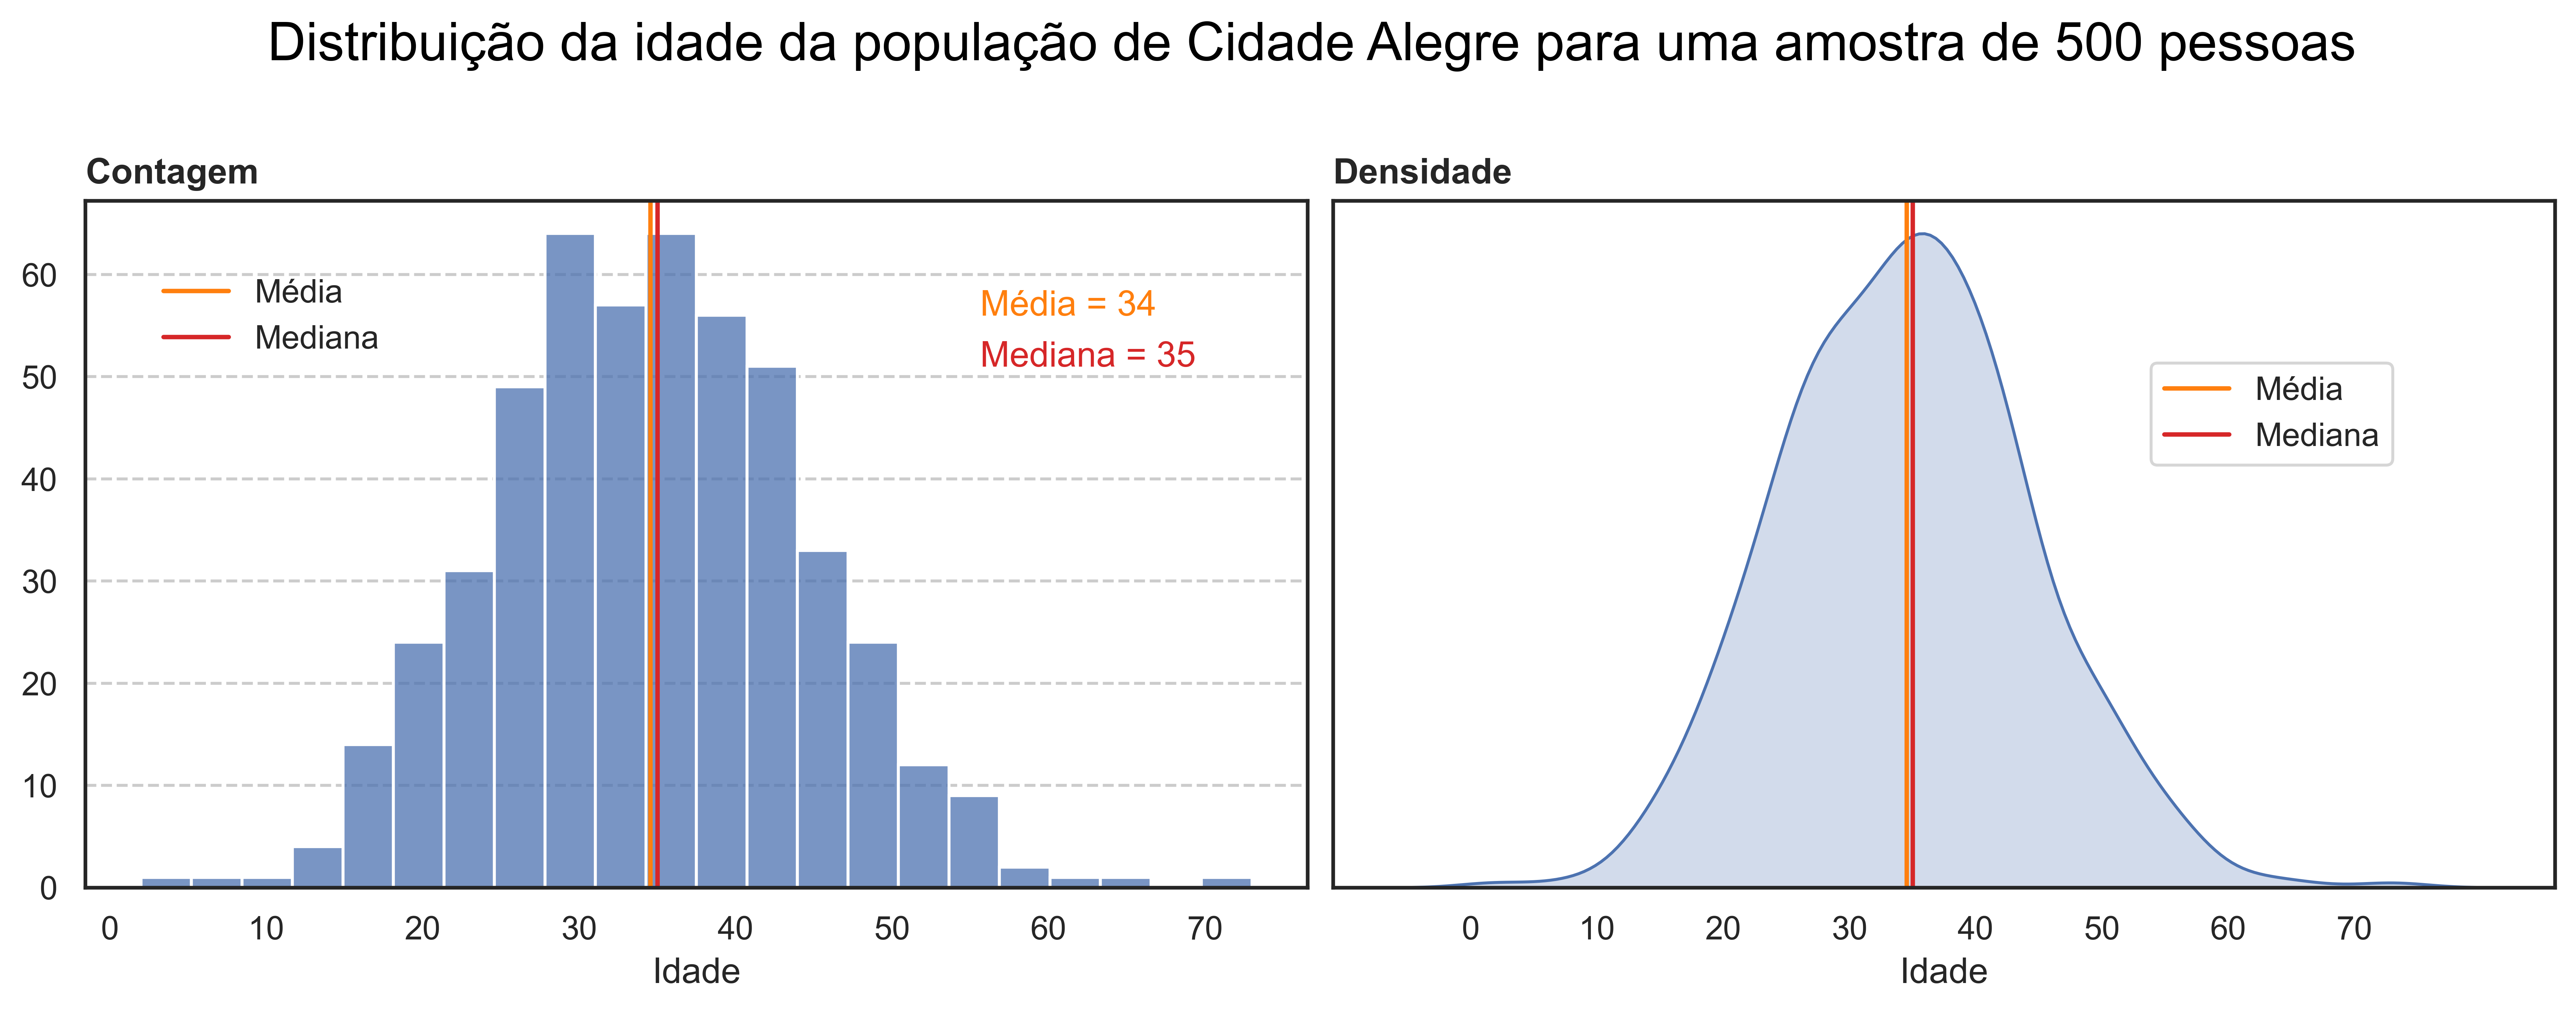

In [15]:
fig, (ax_hist, ax_kde) = plt.subplots(ncols=2, figsize=(12, 4), dpi=600, layout="constrained")
fig.suptitle("Distribuição da idade da população de Cidade Alegre para uma amostra de 500 pessoas", 
             fontsize=18, color="black", x = 0.1, y = 1.15, ha="left")

# --- 
# Linhas Verticais : Média e Mediana da Distribuição
for ax in [ax_hist, ax_kde]:
    ax.axvline(media, color="tab:orange", label="Média")
    ax.axvline(mediana, color="tab:red", label="Mediana")

# ---
# Histograma
# sns.despine(ax=ax_hist, left=True)
sns.histplot(data=df_idades, x="idade", ax=ax_hist)
ax_hist.grid(axis="y",ls="--")
ax_hist.set_xlabel("Idade")
ax_hist.set_ylabel("")
ax_hist.set_title("Contagem", loc="left", weight="bold")
ax_hist.legend(loc="upper left", frameon=False, borderaxespad=2)
# ---
# KDE
# sns.despine(ax=ax_kde, left=True)
sns.kdeplot(data=df_idades, x="idade",ax=ax_kde, fill=True)
ax_kde.set_ylabel("")
ax_kde.set_xlabel("Idade")
ax_kde.set_title("Densidade", loc="left", weight="bold")
ax_kde.yaxis.tick_right()
ax_kde.yaxis.set_label_position("right")
ax_kde.legend(loc="upper right", borderaxespad=5)


# Anotações.
ax_hist.annotate(
    text=fr" Média = {int(media)}",
    xy=(55,56),
    textcoords="data",
    color="tab:orange"
)

ax_hist.annotate(
    text=fr" Mediana = {int(mediana)}",
    xy=(55,51),
    textcoords="data",
    color="tab:red"
)
ax_kde.set_yticks([])
ax_kde.set_xticks(np.arange(0,80,10))
# fig.savefig("Desafio_DistribuindoDados-01.pdf")
plt.show()